# Ejercicios de precipitación

## <font color=steelblue>Ejercicio 3 - Curvas de doble masa<br>

<font color=steelblue>Realiza un análisis mediante la curva de doble masa con los datos proporcionados en la tabla *Exercise_003* del archivo *RainfallData.xlsx*.</font>

In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
#plt.style.use('seaborn-whitegrid')

from scipy.optimize import curve_fit

In [4]:
# Importar los datos
data3 = pd.read_excel('../data/RainfallData.xlsx', sheet_name='Exercise_003',
                      skiprows=0, index_col=0)

# Calcular la media anual entre todas las estaciones
data3['AVG'] = data3.mean(axis=1)

# Serie de precipitación acumulada
accData3 = data3.cumsum()

data3.head()

,A,B,C,D,E,AVG
Year,,,,,,
1926,39.75,45.70,30.69,37.36,32.85,37.270
1927,39.57,38.52,40.99,30.87,28.08,35.606
1928,42.01,48.26,40.44,42.00,33.51,41.244
1929,41.39,34.64,32.49,39.92,29.58,35.604
1930,31.55,45.13,36.72,36.32,23.76,34.696


In [6]:
def linear_reg(x, b):
    """Linear regression with no intecept
    
    y = b * x   
    
    Input:
    ------
    x:         float. Independet value
    b:         float. Slope of the linear regression
    
    Output:
    -------
    y:         float. Regressed value"""
    
    y = b * x
    return y

Estación A

Estación B
Potencial anomalía: año 1930
Potencial anomalía: año 1931
Potencial anomalía: año 1935
Potencial anomalía: año 1936
Potencial anomalía: año 1937
Potencial anomalía: año 1938

Estación C

Estación D

Estación E
Potencial anomalía: año 1930
Potencial anomalía: año 1931
Potencial anomalía: año 1932
Potencial anomalía: año 1933
Potencial anomalía: año 1934



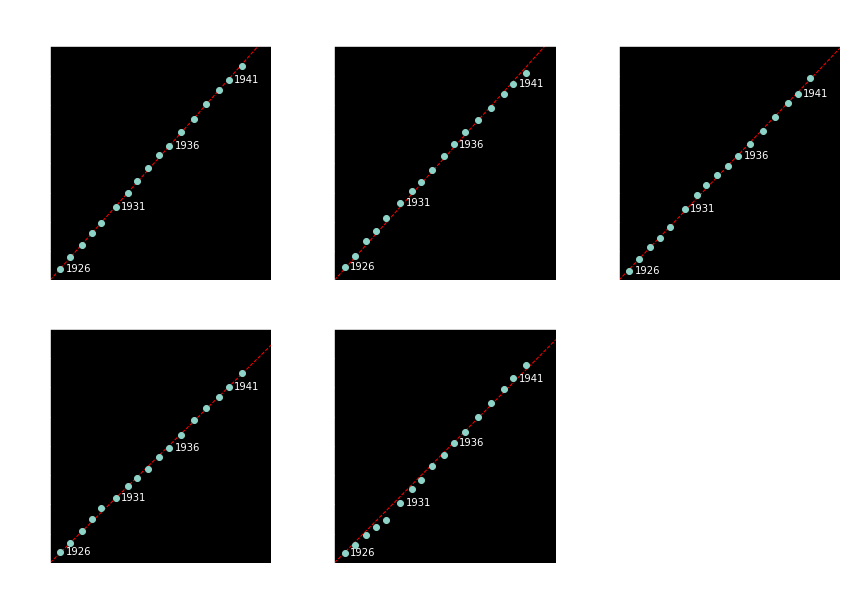

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))
fig.text(0.5, 1.02, 'Gráficos de doble masa de precipitación anual', 
         horizontalalignment='center', fontsize=16, weight='bold')
ax[1, 2].axis("off")
lim = 800
thr = 0.1 # umbral para definir anomalías

for idx, gage in enumerate(["A", "B", "C", "D", "E"]):
    print('Estación', gage)
    # Definir la posición del gráfico
    (ii, jj) = np.unravel_index(idx, (2, 3))
    # Configurar
    ax[ii, jj].set(xlim=(0, lim), ylim=(0, lim))
    ax[ii, jj].set_xlabel('estación ' + gage, fontsize=13)
    ax[ii, jj].set_ylabel('media de las estaciones', fontsize=13)
    
    # Recta de pendiente 1
    b = curve_fit(linear_reg, accData3.AVG, accData3[gage])[0][0]
    ax[ii, jj].plot([0, lim], [0, b * lim], 'r--', linewidth=1)
    
    # Gráfico de dispersión
    ax[ii, jj].plot(accData3.AVG, accData3[gage], 'o')
    
    # label one every five years
    years = accData3.index[::5]
    xyear = [accData3.loc[year, 'AVG'] + 20 for year in years]
    yyear = [accData3.loc[year, gage] for year in years] 
    for i, year in enumerate(years):
        ax[ii, jj].text(xyear[i], yyear[i], year,
                        verticalalignment='center')
                        
    # identificar estaciones y años con anomalía
    for j, year in enumerate(accData3.index[4:-4]):
        # pendiente de la regresión lineal hasta j
        p1 = np.polyfit(accData3.loc[:year, 'AVG'],
                        accData3.loc[:year, gage], 1)
        # pendiente de la regresión linean desde j+1
        p2 = np.polyfit(accData3.loc[year + 1:, 'AVG'],
                        accData3.loc[year + 1:, gage], 1)
        # hay anomalía si el cambio de la pendiente es notable
        if (p1[0] / p2[0] < 1 - thr) | (p1[0] / p2[0] > 1 + thr):
            print("Potencial anomalía: año {0}".format(year))
    print()
    
plt.tight_layout()

Dos pluviómetros muestran inconsistencias: el pluviómetro B dos cambios de pendiente en 1930 y 1935,  y el pluviómetro E en el año 1930.

**Corregir pluviómetro B**

In [9]:
# pendiente antes de 1930
# -----------------------
b1 = curve_fit(linear_reg, accData3.loc[:1930, 'AVG'],
               accData3.loc[:1930, 'B'])[0][0]
b1

1.1440964837032106

In [10]:
# pendiente de 1931 a 1935
# ------------------------
temp = data3.loc[1931:1935, :]
accTemp = temp.cumsum(axis=0)
b2 = curve_fit(linear_reg, accTemp.loc[:, 'AVG'],
               accTemp.loc[:, 'B'])[0][0]
del temp, accTemp
b2

0.9842422849741361

In [11]:
# pendiente a partir de 1936
# --------------------------
temp = data3.loc[1936:, :]
accTemp = temp.cumsum(axis=0)
b3 = curve_fit(linear_reg, accTemp.loc[:, 'AVG'],
               accTemp.loc[1:, 'B'])[0][0]
del temp, accTemp
b3

0.9722932050016689

Puesto que la pendiente en el segundo y tercer periodo es similar, asumimos que el periodo incorrecto es hasta 1930.

In [12]:
# pendiente desde 1931
# --------------------
temp = data3.loc[1931:, :]
accTemp = temp.cumsum(axis=0)
b_ok = curve_fit(linear_reg, accTemp.loc[:, 'AVG'],
                 accTemp.loc[:, 'B'])[0][0]
del temp, accTemp
b_ok

0.9937661079160598

In [13]:
# corregir la serie hasta 1930
# ----------------------------
data3['B_c'] = data3.B.copy()
data3.loc[:1930, 'B_c'] = data3.loc[:1930, 'B'] * b_ok / b1
# accumulate corrected data
accData3 = data3.cumsum(axis=0)

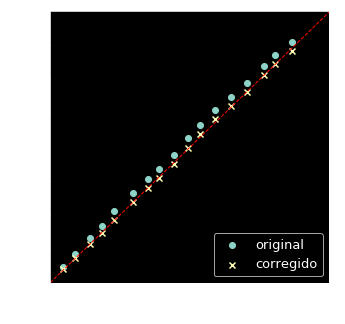

In [15]:
# Gráfico serie corregida vs original
# -----------------------------------
fig, ax = plt.subplots(figsize=(5,5))
# setup
ax.set(xlim=(0, lim), ylim=(0, lim))
ax.set_xlabel('media estaciones', fontsize=13)
ax.set_ylabel('estación B', fontsize=13)

b = curve_fit(linear_reg, accData3.AVG, accData3.B_c)[0][0]
ax.plot([0, lim], [0, b * lim], '--r', linewidth=1)

ax.scatter(accData3.AVG, accData3.B, label='original')
ax.scatter(accData3.AVG, accData3.B_c, marker='x', label='corregido')

ax.legend(loc=4, fontsize=13);

**Corregir estación E**<br>
Asumimos que la serie correcta es a partir de 1931 en adelante.

In [16]:
# pendiente hasta 1930
# --------------------
b_wrong = curve_fit(linear_reg, accData3.loc[:1930, 'AVG'],
                    accData3.loc[:1930, 'E'])[0][0]
b_wrong

0.8176415003641067

In [17]:
# pendiente desde 1931
# --------------------
temp = data3.loc[1931:, :]     # extract raw data
accTemp = temp.cumsum(axis=0) # accumulate series
b_ok = curve_fit(linear_reg, accTemp.AVG, accTemp.E)[0][0]
del temp, accTemp
b_ok

1.0478300389771686

In [18]:
# corregir series hasta 1930
# --------------------------
data3['E_c'] = data3.E
data3.loc[:1930, 'E_c'] = data3.loc[:1930, 'E'] * b_ok / b_wrong
# accumulate corrected data
accData3 = data3.cumsum(axis=0)

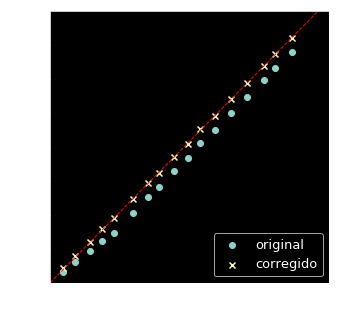

In [20]:
# Plot corrected vs original values
# ---------------------------------
fig, ax = plt.subplots(figsize=(5,5))
# setup
ax.set(xlim=(0, lim), ylim=(0, lim))
ax.set_xlabel('media estaciones', fontsize=13)
ax.set_ylabel('estación E', fontsize=13)

b = curve_fit(linear_reg, accData3.AVG, accData3.E_c)[0][0]
ax.plot([0, lim], [0, b * lim], '--r', linewidth=1)

ax.scatter(accData3.AVG, accData3.E, label='original')
ax.scatter(accData3.AVG, accData3.E_c, marker='x', label='corregido')

ax.legend(loc=4, fontsize=13);